# 1/Import library

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 4.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostRegressor, CatBoostClassifier
from lightgbm import LGBMClassifier

# Scoring functions
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt
import seaborn as sns


# 2/Import dataset

In [ ]:
telco = pd.read_csv('/content/TelcoCustomerChurn.csv')
telco.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Bỏ cột customerID
telco = telco.drop(telco.columns[0], axis = 1)
telco

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
telco.shape

(7043, 20)

In [ ]:
telco['TotalCharges'] = pd.to_numeric(telco.TotalCharges, errors='coerce')
telco.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<Axes: >

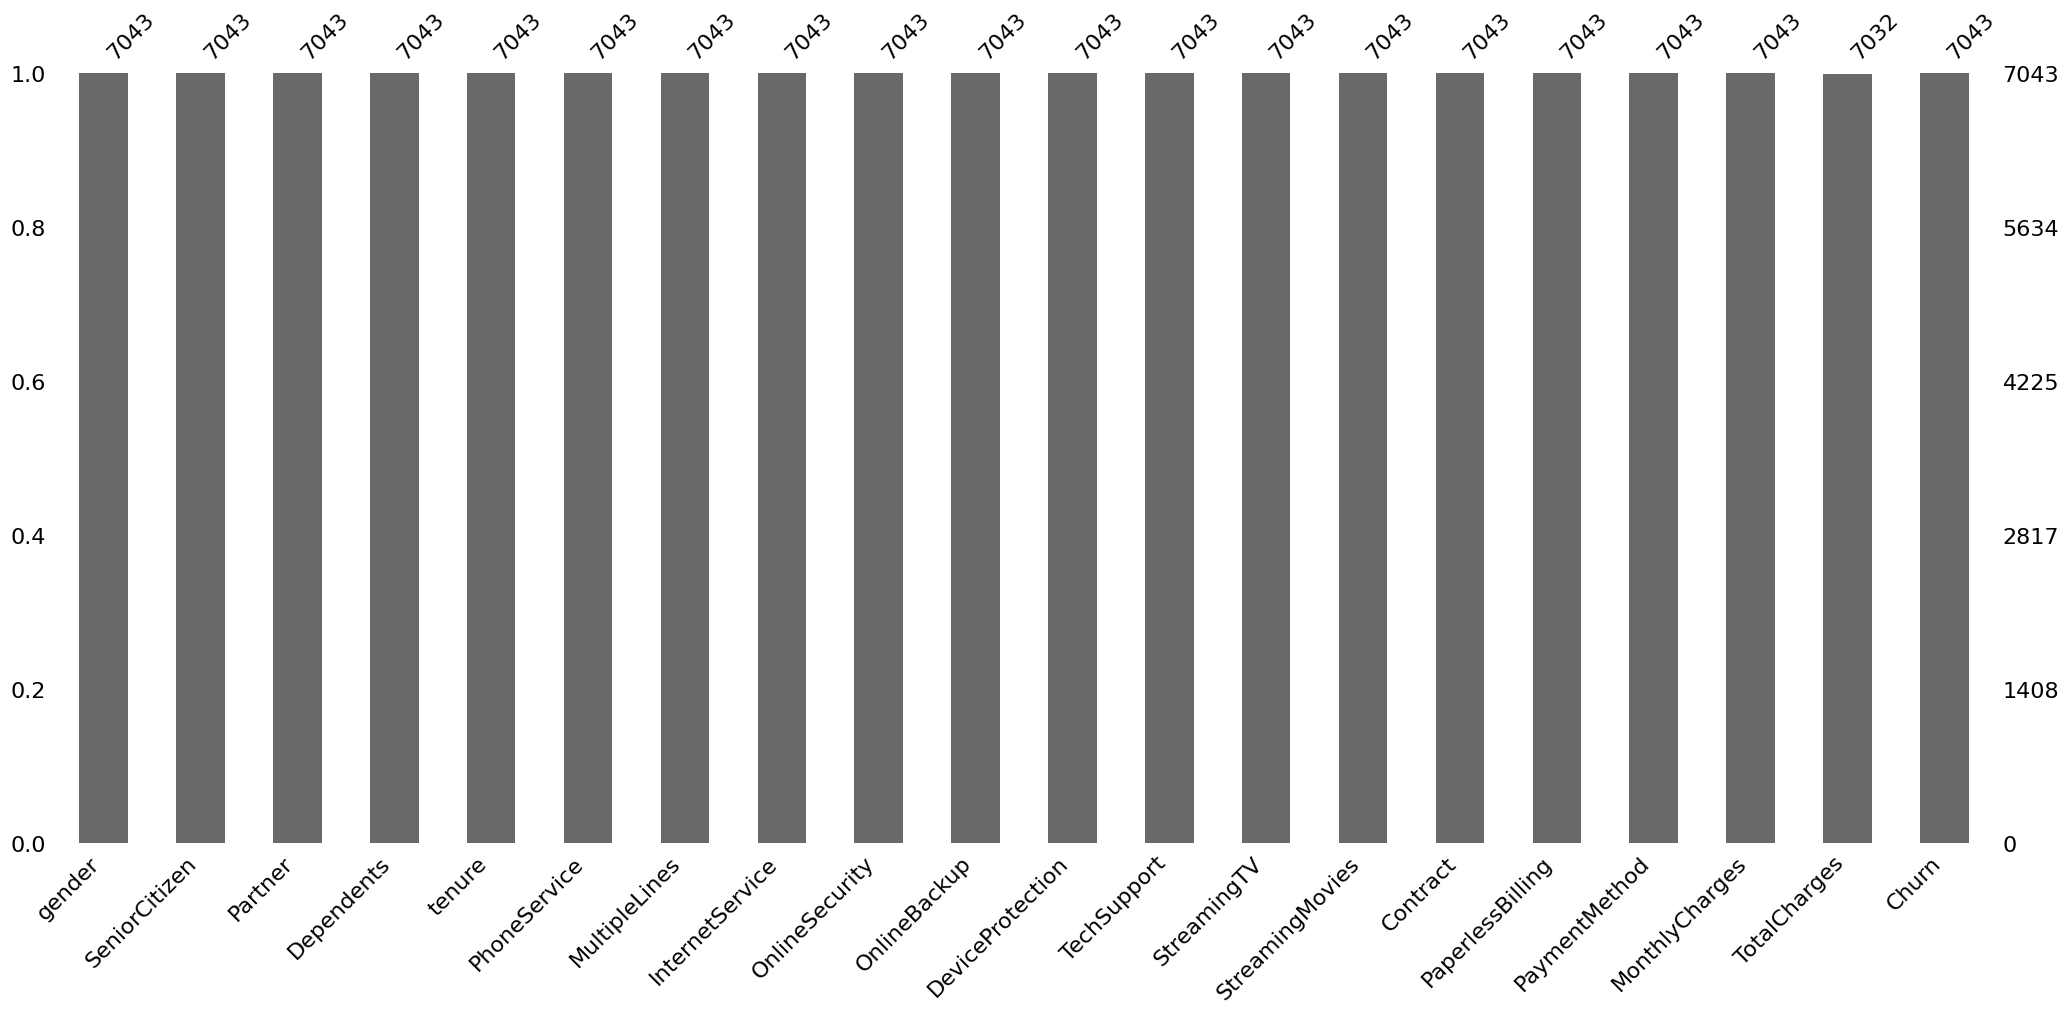

In [ ]:
import missingno as msno
msno.bar(telco)

<Axes: >

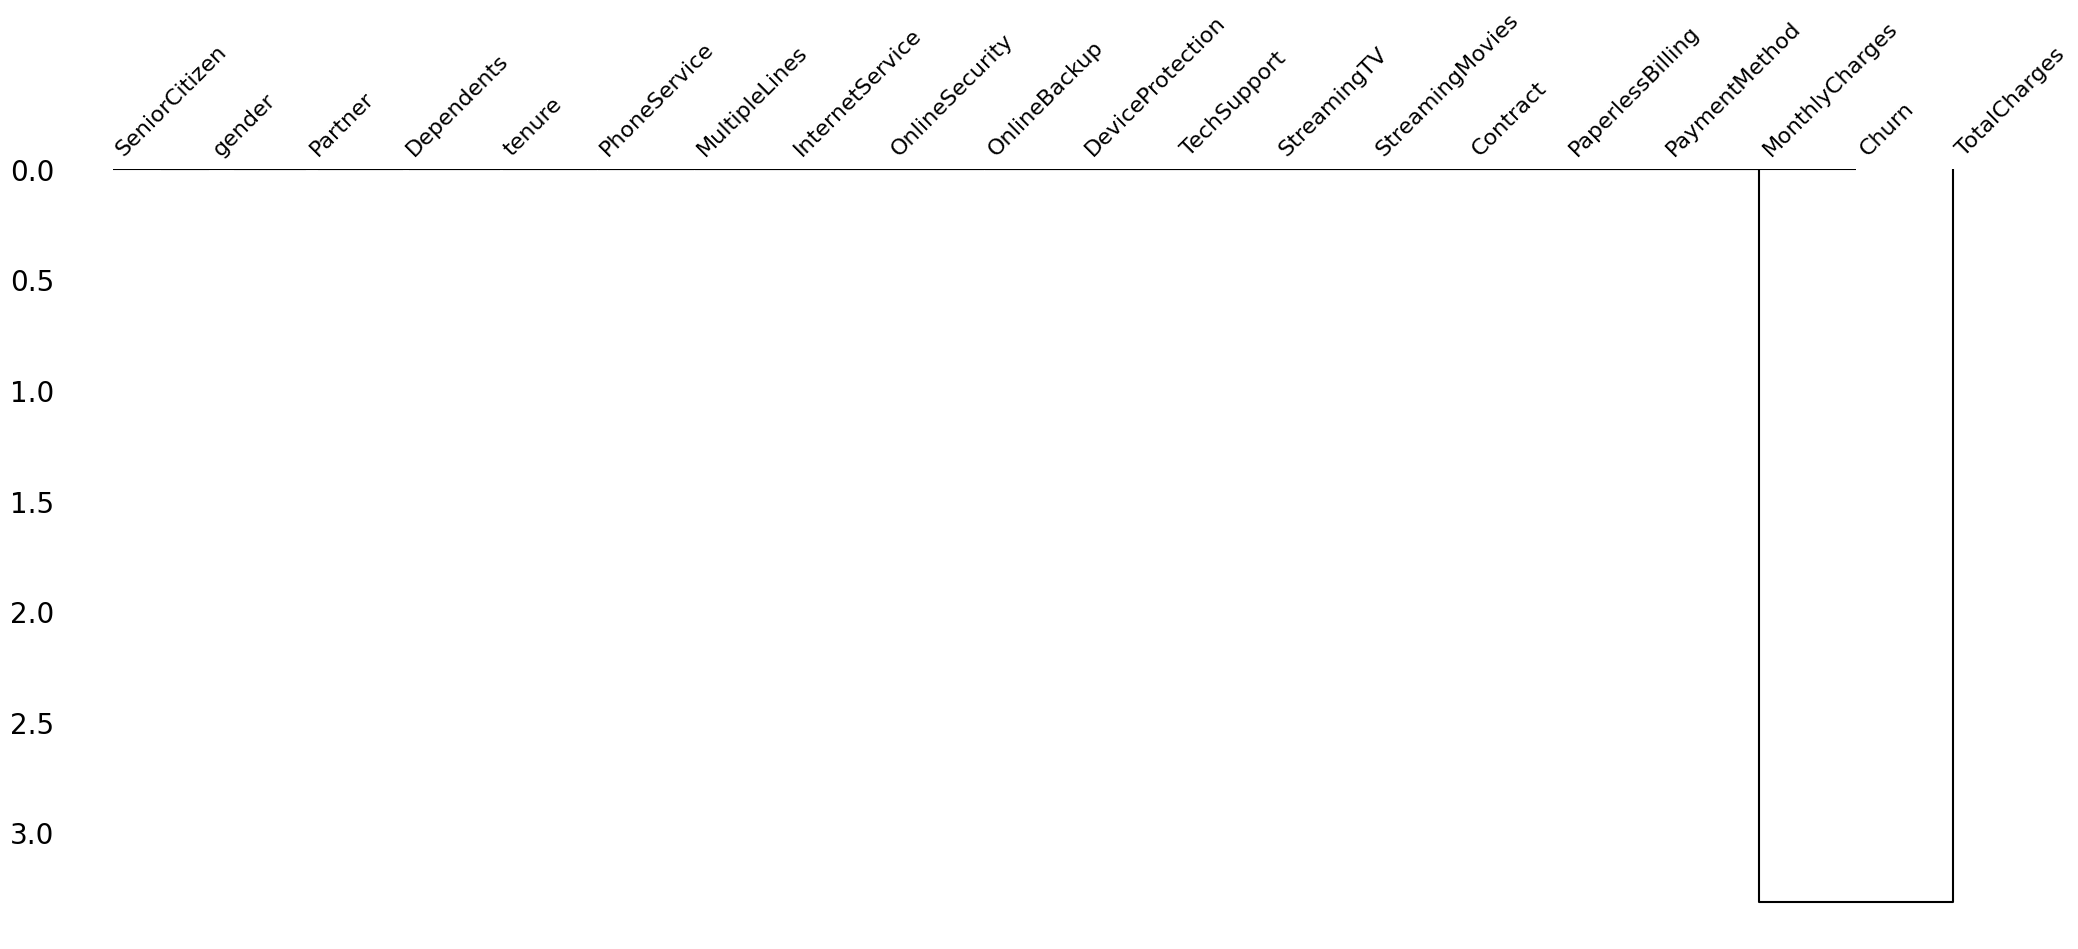

In [ ]:
msno.dendrogram(telco)

In [ ]:
telco['TotalCharges'].dtype

dtype('float64')

In [ ]:
telco[telco['TotalCharges'].isnull()][['tenure','TotalCharges']]

,tenure,TotalCharges
488,0,NaN
753,0,NaN
936,0,NaN
1082,0,NaN
1340,0,NaN
3331,0,NaN
3826,0,NaN
4380,0,NaN
5218,0,NaN
6670,0,NaN


In [ ]:
telco[telco['tenure']==0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [ ]:
telco[telco['TotalCharges'].isnull()].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Những người có tenure = 0 tức không sử dụng dịch vụ tương ứng có giá trị nan ở cột TotalCharges. Và số lượng chỉ có 11 nên loại bỏ không gây ảnh hưởng nhiều.

In [ ]:
telco = telco.loc[telco["tenure"] !=0].reset_index(drop=True)
telco[telco['tenure']==0].index

Int64Index([], dtype='int64')

In [ ]:
telco[telco['TotalCharges'].isnull()].index

Int64Index([], dtype='int64')

In [ ]:
telco.shape

(7032, 20)

In [ ]:
telco

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
telco.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
origin_data = telco.copy()

# 3/Data visualization

In [ ]:
churn = len(telco[telco["Churn"]=='Yes'])
retention = len(telco[telco["Churn"]=='No'])
percent_churn = churn/(churn+retention)
percent_retention = retention/(churn+retention)
print('Tỉ lệ rời bỏ trong bộ dataset: ',percent_churn)
print('Tỉ lệ ở lại trong bộ dataset: ',percent_retention)


Tỉ lệ rời bỏ trong bộ dataset:  0.26578498293515357
Tỉ lệ ở lại trong bộ dataset:  0.7342150170648464


Text(0.5, 1.0, '% of Attrition')

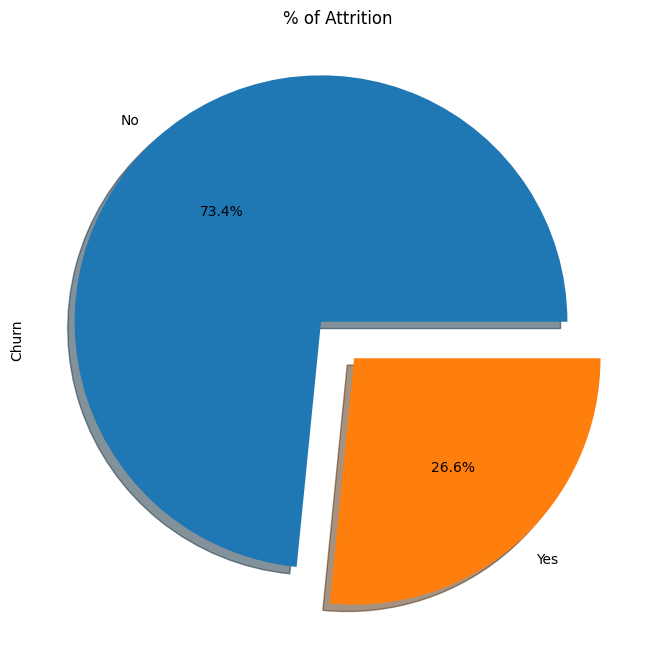

In [ ]:
telco['Churn'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8));
plt.title("% of Attrition")

Dữ liệu bị mất cân bằng khi tỉ lệ rời bỏ với ở lại là 27:73. Để xây dựng mô hình dự đoán tốt hơn, nhóm xem xét và chọn ra phương pháp xử lý mất cân bằng dữ liệu này.

Visualize mối quan hệ giữa các biến độc lập và biến phụ thuộc và diễn giải

In [ ]:
#Chuyển đổi dữ liệu [0,1] thành [No,Yes]
telco["SeniorCitizen"] = telco["SeniorCitizen"].map({0: "No", 1: "Yes"})
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(14,10))
# sns.countplot('gender',hue='Churn',data=telco,color='darkred',ax=ax[0,0])
# sns.countplot('SeniorCitizen',hue='Churn',data=telco,color='yellow',ax=ax[0,1])
# sns.countplot('Partner',hue='Churn',data=telco,color='cyan',ax=ax[1,0])
# sns.countplot('Dependents',hue='Churn',data=telco,color='black',ax=ax[1,1])
# plt.show()

Tỉ lệ công dân cao tuổi là ít và đa số họ đều rời bỏ doanh nghiệp.
Những người không có partner hay dependents có xu hướng rời bỏ doanh nghiệp.
Có sự đồng điệu hành vi rời bỏ doanh nghiệp giữa nam và nữ

Text(0.5, 1.0, '% of Gender')

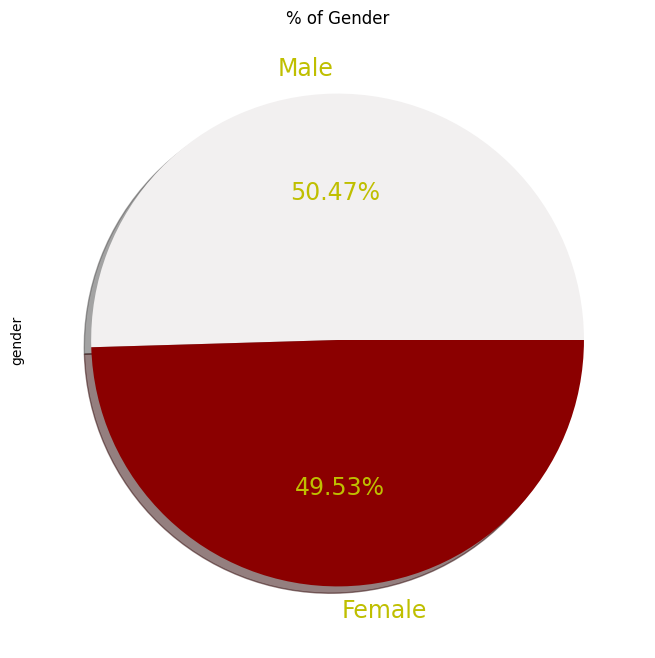

In [ ]:
telco['gender'].value_counts().plot.pie(explode=[0,0],autopct='%1.2f%%',shadow=True,figsize=(10,8),colors = ["#F2F0F0","darkred"], textprops={'fontsize': 17,'color':"y"});
plt.title("% of Gender")

Text(0.5, 1.0, '% of SeniorCitizen')

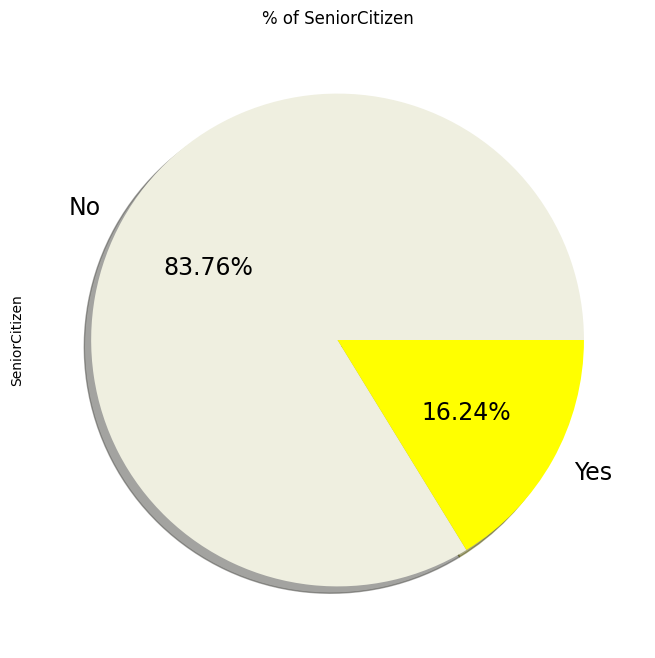

In [ ]:
telco['SeniorCitizen'].value_counts().plot.pie(explode=[0,0],autopct='%1.2f%%',shadow=True,figsize=(10,8),colors = ["#EFEFE0","yellow"], textprops={'fontsize': 17});
plt.title("% of SeniorCitizen")

Text(0.5, 1.0, '% of Partner')

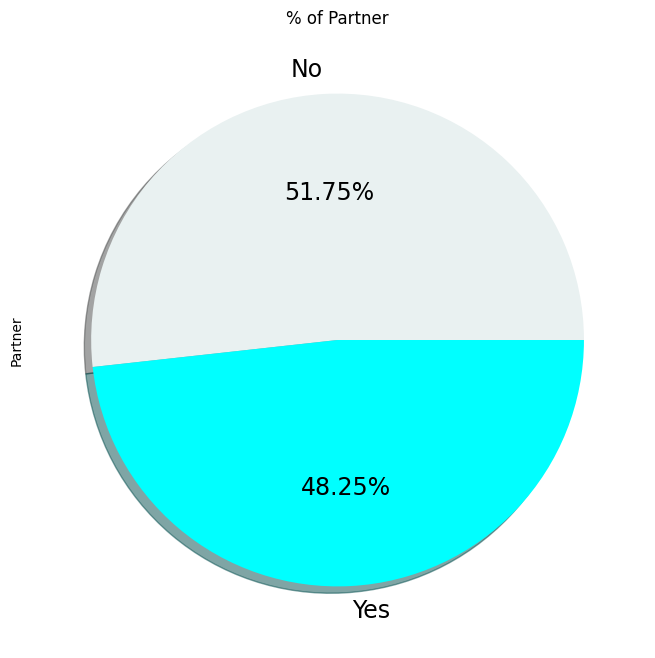

In [ ]:
telco['Partner'].value_counts().plot.pie(explode=[0,0],autopct='%1.2f%%',shadow=True,figsize=(10,8),colors = ["#E9F1F1","cyan"], textprops={'fontsize': 17});
plt.title("% of Partner")

Text(0.5, 1.0, '% of Dependents')

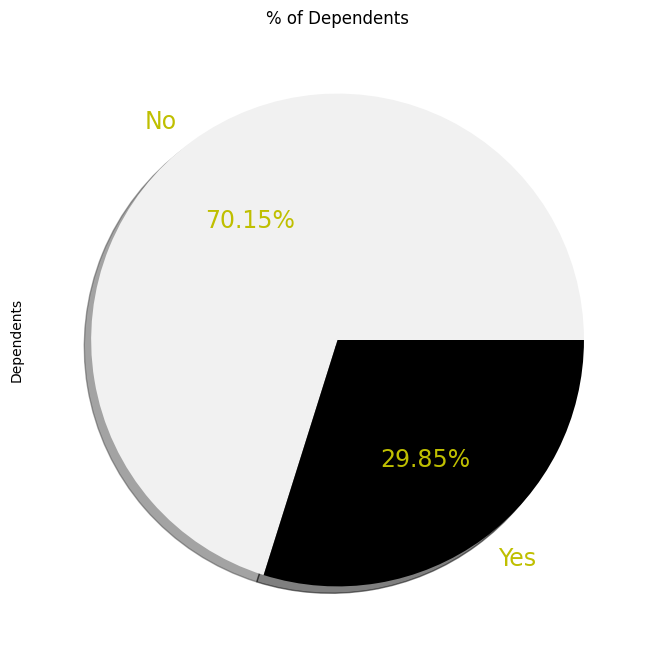

In [ ]:
telco['Dependents'].value_counts().plot.pie(explode=[0,0],autopct='%1.2f%%',shadow=True,figsize=(10,8),colors = ["#F1F1F1","black"], textprops={'fontsize': 17,'color':'y'});
plt.title("% of Dependents")

In [ ]:
# fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(14,10))
# sns.countplot('MultipleLines',hue='Churn',data=telco,color='darkblue',ax=ax[0,0])
# sns.countplot('PhoneService',hue='Churn',data=telco,color='firebrick',ax=ax[0,1])
# sns.countplot('InternetService',hue='Churn',data=telco,color='goldenrod',ax=ax[1,0])
# sns.countplot('OnlineSecurity',hue='Churn',data=telco,color='darkslategray',ax=ax[1,1])
# plt.show()

- Khách hàng sử dụng dịch vụ mạng Fiber optic có xu hướng rời bỏ cao.

- Khách hàng không sử dụng bảo mật online tỉ lệ rời bỏ DN cao

- Kết luận chung:A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.

Text(0.5, 1.0, '% of MultipleLines')

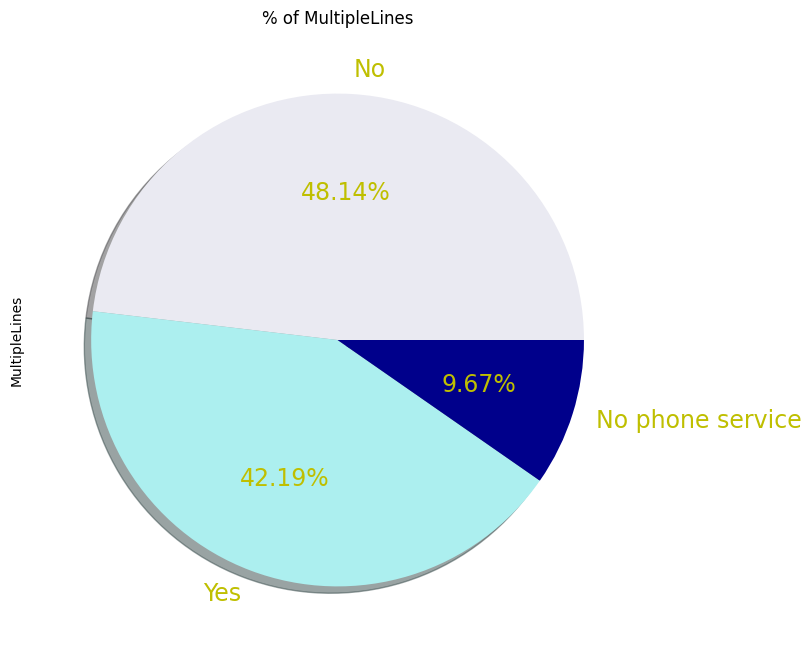

In [ ]:
telco['MultipleLines'].value_counts().plot.pie(explode=[0,0,0],autopct='%1.2f%%',shadow=True,figsize=(10,8),colors = ["#EAEAF2",'#acefef',"darkblue"], textprops={'fontsize': 17,'color':'y'});
plt.title("% of MultipleLines")

Text(0.5, 1.0, '% of PhoneService')

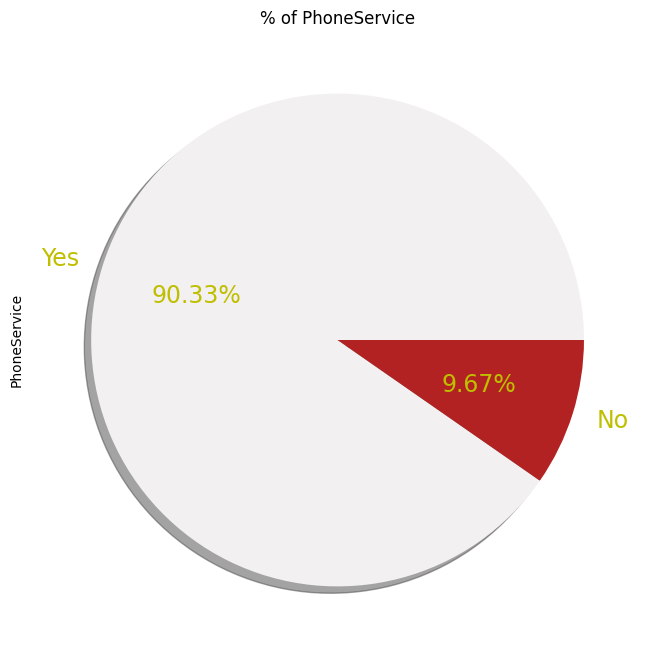

In [ ]:
telco['PhoneService'].value_counts().plot.pie(explode=[0,0],autopct='%1.2f%%',shadow=True,figsize=(10,8),colors = ["#F2F0F0","firebrick"], textprops={'fontsize': 17,'color':'y'});
plt.title("% of PhoneService")

Text(0.5, 1.0, '% of InternetService')

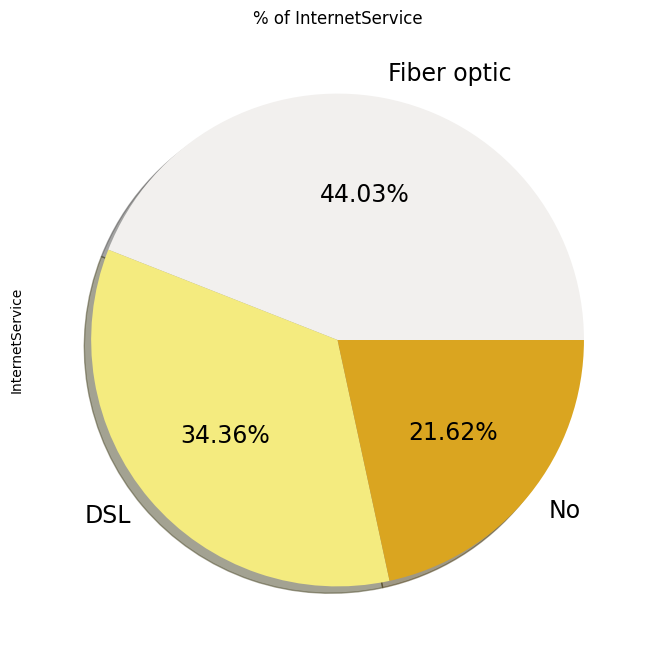

In [ ]:
telco['InternetService'].value_counts().plot.pie(explode=[0,0,0],autopct='%1.2f%%',shadow=True,figsize=(10,8),colors = ["#F2F0EE",'#f4eb7f',"goldenrod"], textprops={'fontsize': 17});
plt.title("% of InternetService")

Text(0.5, 1.0, '% of OnlineSecurity')

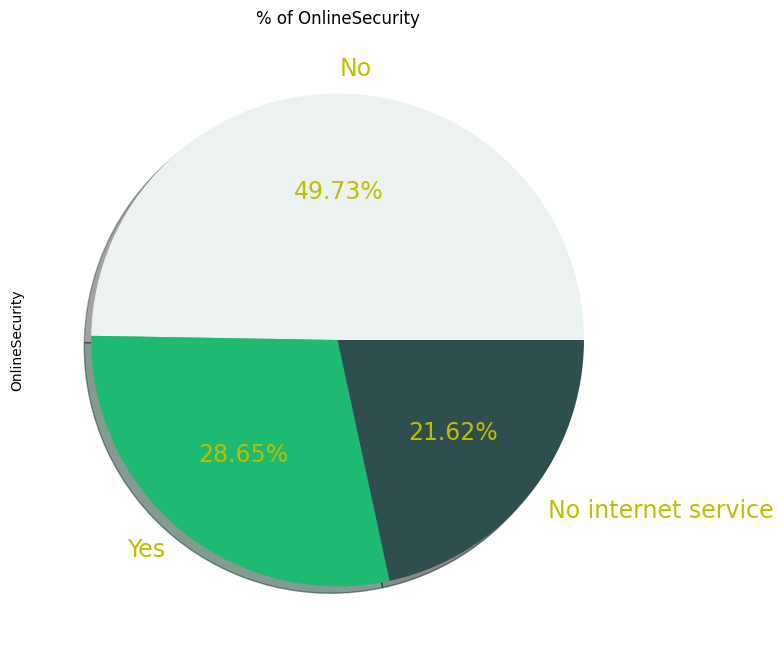

In [ ]:
telco['OnlineSecurity'].value_counts().plot.pie(explode=[0,0,0],autopct='%1.2f%%',shadow=True,figsize=(10,8),colors = ["#ECF1F1",'#1fba72',"darkslategray"], textprops={'fontsize': 17,'color':'y'});
plt.title("% of OnlineSecurity")

In [ ]:
# fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(14,10))
# sns.countplot('OnlineBackup',hue='Churn',data=telco,color='aqua',ax=ax[0,0],)
# sns.countplot('DeviceProtection',hue='Churn',data=telco,color='crimson',ax=ax[0,1])
# sns.countplot('TechSupport',hue='Churn',data=telco,color='indigo',ax=ax[1,0])
# sns.countplot('StreamingTV',hue='Churn',data=telco,color='saddlebrown',ax=ax[1,1])
# plt.show()

Những khách hàng không sửu dụng dvu hỗ trợ công nghệ có xu hướng chuyển sang nhà cung cấp dịch vụ khác.



Text(0.5, 1.0, '% of OnlineSecurity')

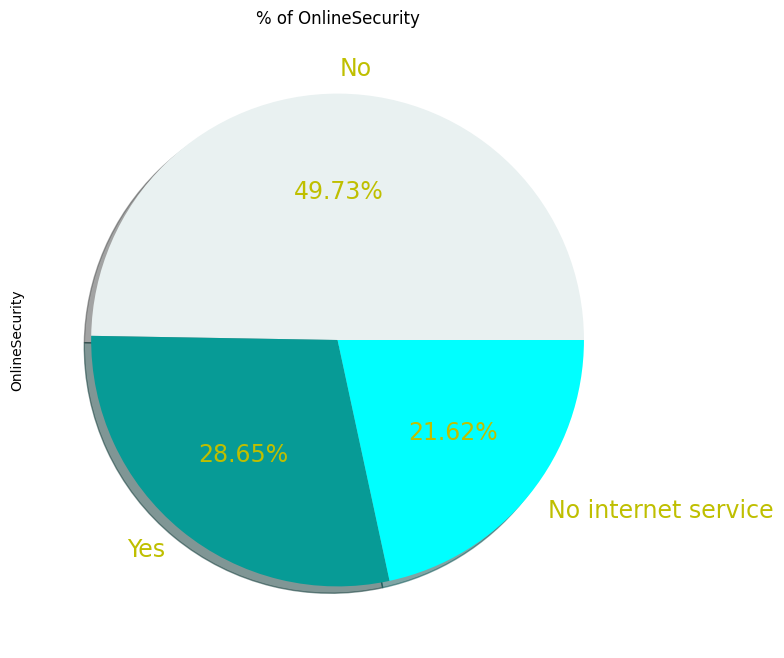

In [ ]:
telco['OnlineSecurity'].value_counts().plot.pie(explode=[0,0,0],autopct='%1.2f%%',shadow=True,figsize=(10,8),colors = ["#E9F1F1",'#079b96',"aqua"], textprops={'fontsize': 17,'color':'y'});
plt.title("% of OnlineSecurity")

Text(0.5, 1.0, '% of OnlineSecurity')

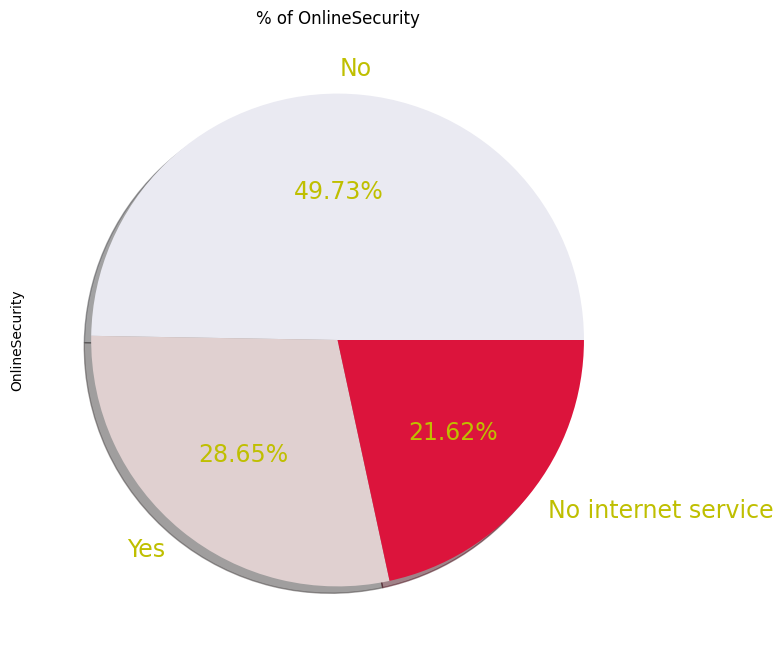

In [ ]:
telco['OnlineSecurity'].value_counts().plot.pie(explode=[0,0,0],autopct='%1.2f%%',shadow=True,figsize=(10,8),colors = ["#EAEAF2",'#e0d0d0',"crimson"], textprops={'fontsize': 17,'color':'y'});
plt.title("% of OnlineSecurity")

Text(0.5, 1.0, '% of OnlineSecurity')

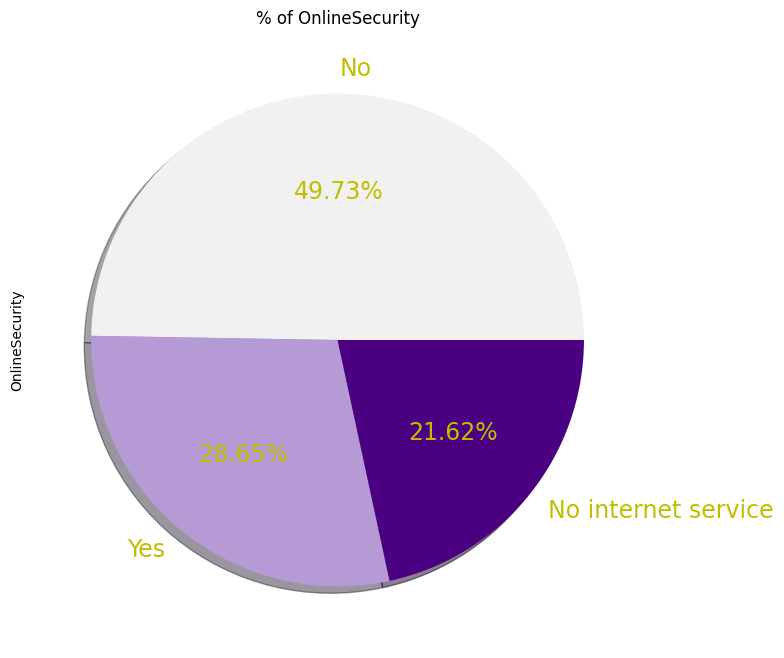

In [ ]:
telco['OnlineSecurity'].value_counts().plot.pie(explode=[0,0,0],autopct='%1.2f%%',shadow=True,figsize=(10,8),colors = ["#F1F1F2",'#b69ad6',"indigo"], textprops={'fontsize': 17,'color':'y'});
plt.title("% of OnlineSecurity")

Text(0.5, 1.0, '% of OnlineSecurity')

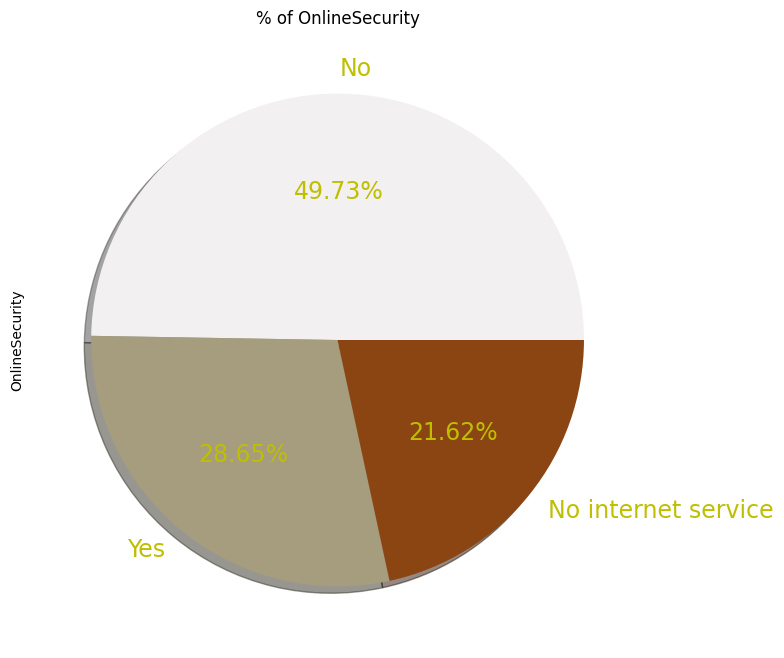

In [ ]:
telco['OnlineSecurity'].value_counts().plot.pie(explode=[0,0,0],autopct='%1.2f%%',shadow=True,figsize=(10,8),colors = ["#F2F0F0",'#a59d7d',"saddlebrown"], textprops={'fontsize': 17,'color':'y'});
plt.title("% of OnlineSecurity")

In [ ]:
# fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(14,10))
# sns.countplot('StreamingMovies',hue='Churn',data=telco,color='salmon',ax=ax[0,0])
# sns.countplot('PaperlessBilling',hue='Churn',data=telco,color='forestgreen',ax=ax[0,1])
# sns.countplot('Contract',hue='Churn',data=telco,color='darkorange',ax=ax[1,0])
# sns.countplot('PaymentMethod',hue='Churn',data=telco,color='violet',ax=ax[1,1])
# plt.xticks(rotation=15)
# plt.show()

Hầu như những người sử dụng phương thức thanh toán Electronic Check hay sử dụng hợp đồng ngắn hạn theo tháng đều rời bỏ doanh nghiệp.

Những khách hàng sử dụng thanh toán không giấy tờ có xu hướng rời bỏ doanh nghiệp

Text(0.5, 1.0, '% of OnlineSecurity')

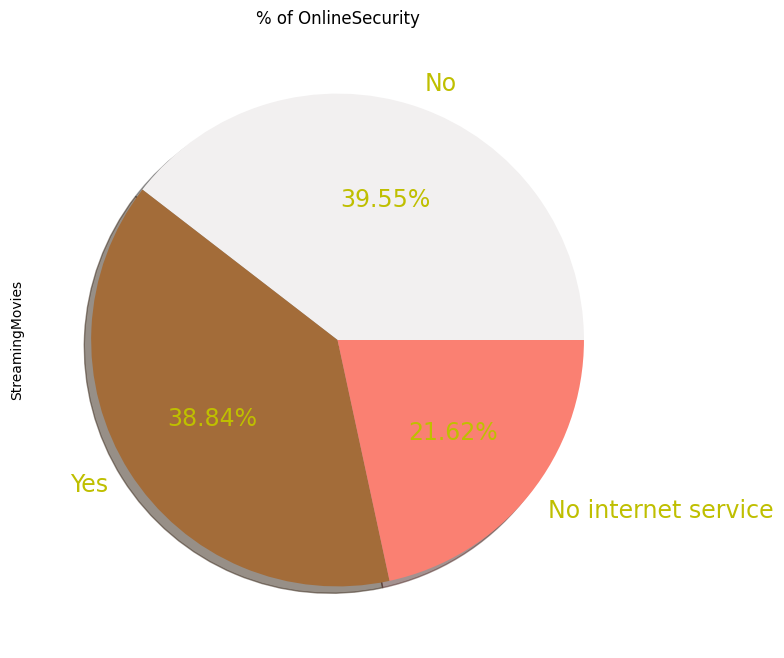

In [ ]:
telco['StreamingMovies'].value_counts().plot.pie(explode=[0,0,0],autopct='%1.2f%%',shadow=True,figsize=(10,8),colors = ["#F2F0F0",'#a36c39',"salmon"], textprops={'fontsize': 17,'color':'y'});
plt.title("% of OnlineSecurity")

Text(0.5, 1.0, '% of OnlineSecurity')

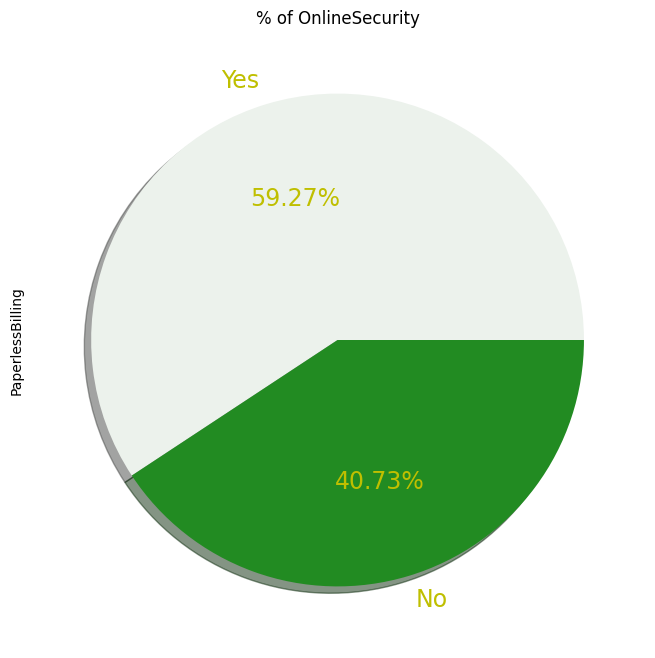

In [ ]:
telco['PaperlessBilling'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True,figsize=(10,8),colors = ["#ECF2EC","forestgreen"], textprops={'fontsize': 17,'color':'y'});
plt.title("% of OnlineSecurity")

Text(0.5, 1.0, '% of OnlineSecurity')

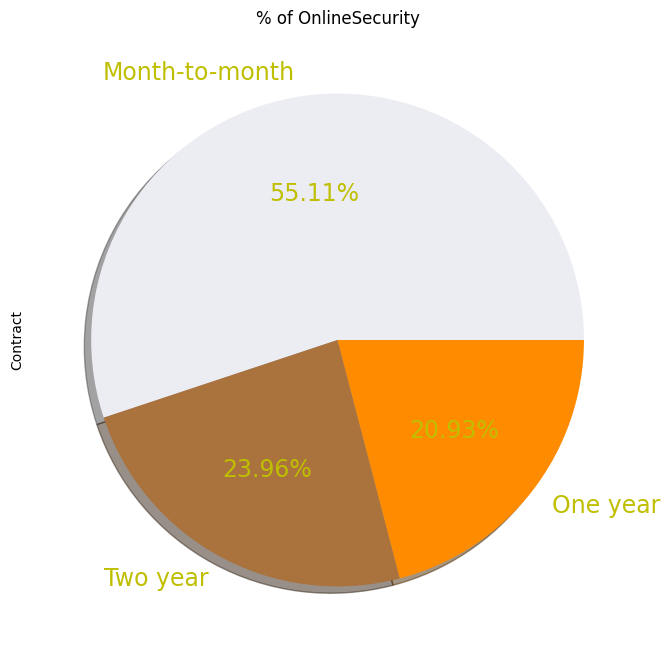

In [ ]:
telco['Contract'].value_counts().plot.pie(explode=[0,0,0],autopct='%1.2f%%',shadow=True,figsize=(10,8),colors = ["#ECECF3",'#aa723d',"darkorange"], textprops={'fontsize': 17,'color':'y'});
plt.title("% of OnlineSecurity")

Text(0.5, 1.0, '% of OnlineSecurity')

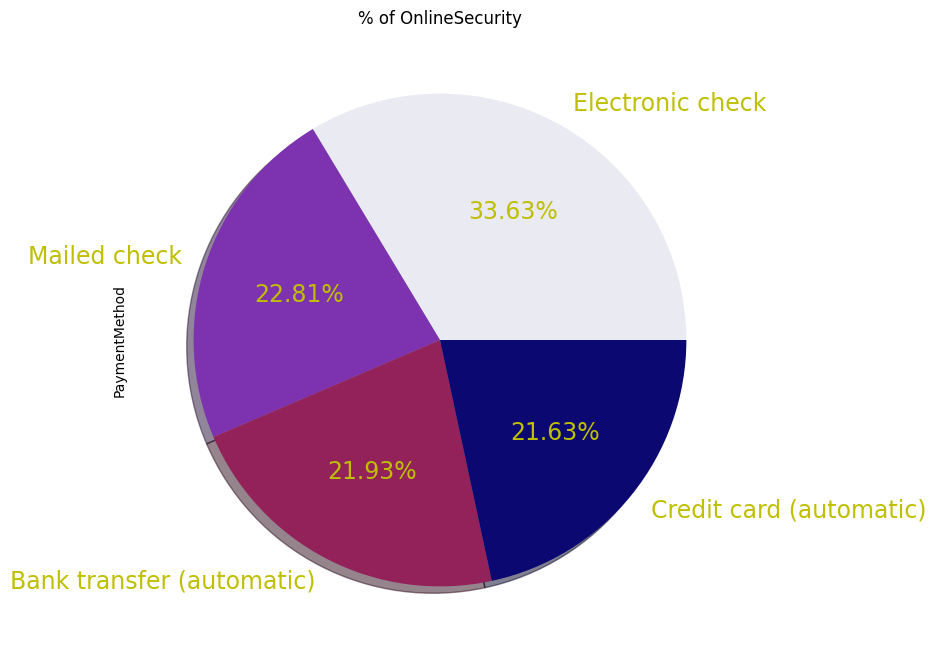

In [ ]:
telco['PaymentMethod'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True,figsize=(10,8),colors = ["#EAEAF2","#7d33af",'#93225a','#0b0872'], textprops={'fontsize': 17,'color':'y'});
plt.title("% of OnlineSecurity")

In [ ]:
num_cols = ['tenure','MonthlyCharges','TotalCharges']
telco[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


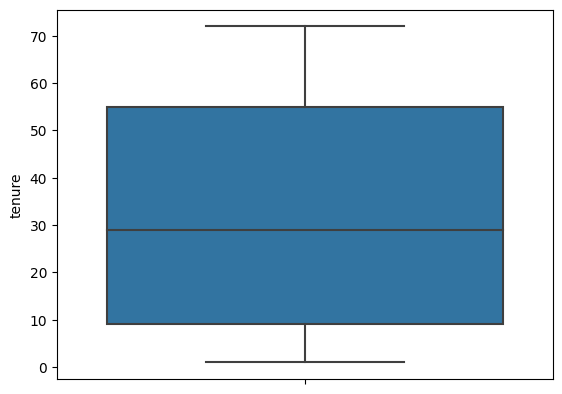

In [ ]:
sns.boxplot( y=telco["tenure"] );
plt.show()

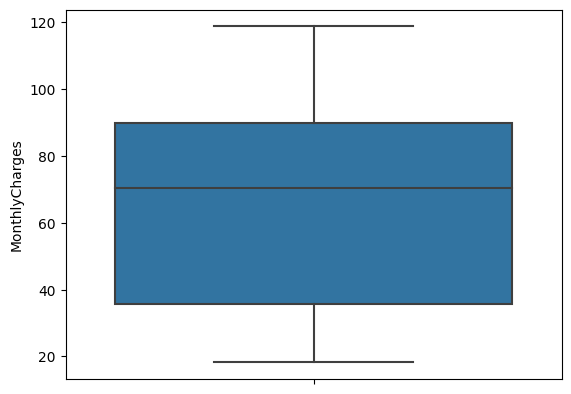

In [ ]:
sns.boxplot( y=telco["MonthlyCharges"] );
plt.show()

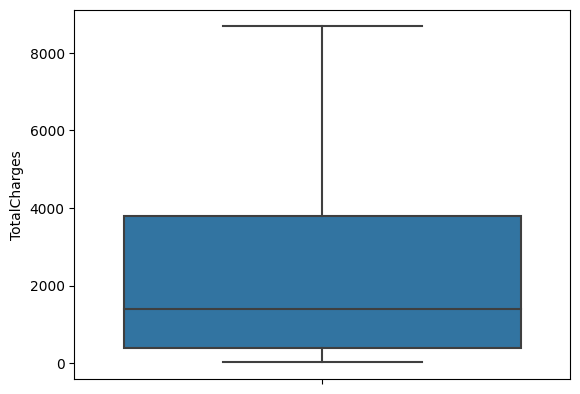

In [ ]:
sns.boxplot( y=telco["TotalCharges"] );
plt.show()

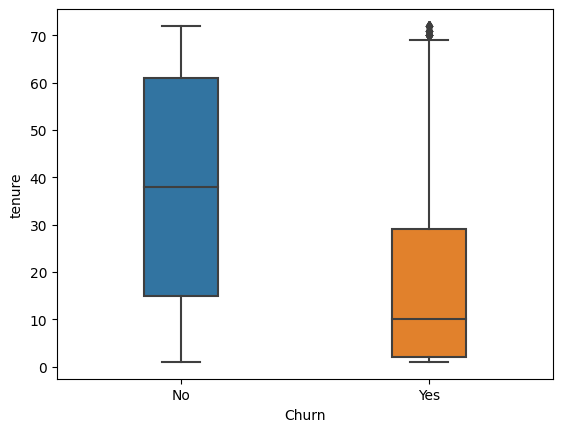

In [ ]:
sns.boxplot( x=telco["Churn"], y=telco["tenure"], width=0.3);
plt.show()

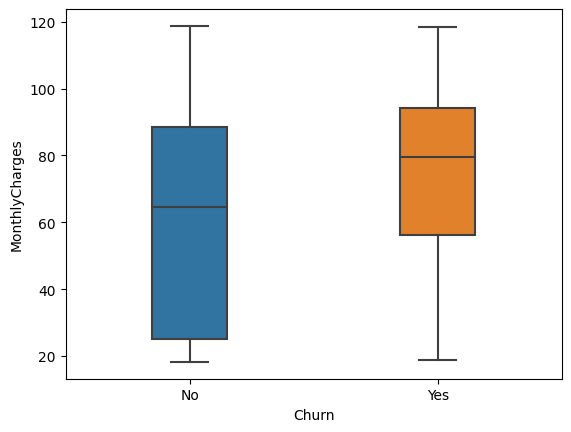

In [ ]:
sns.boxplot( x=telco["Churn"], y=telco["MonthlyCharges"], width=0.3);
plt.show()

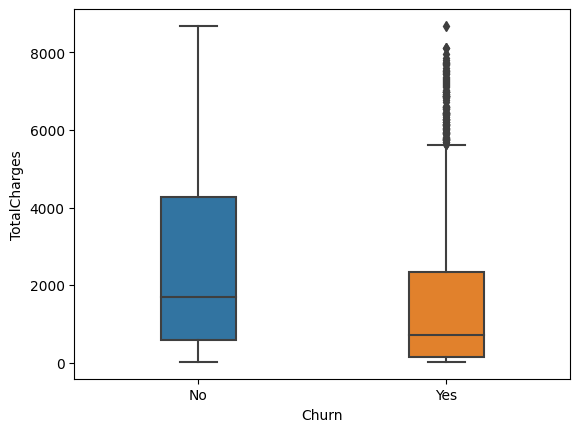

In [ ]:
sns.boxplot( x=telco["Churn"], y=telco["TotalCharges"], width=0.3);
plt.show()

In [ ]:
# sns.set(style="darkgrid")
# sns.displot(telco, x="tenure", hue="Churn", kind="kde", fill=True,ax=ax[0,0])
# sns.displot(telco, x="MonthlyCharges", hue="Churn", kind="kde", fill=True,ax=ax[0,1])
# sns.displot(telco, x="TotalCharges", hue="Churn", kind="kde", fill=True,ax=ax[1,0])

# plt.legend()
# plt.xticks(rotation=15)
# plt.show()

Những khách hàng trả phí hàng tháng cao có xu hướng rời bỏ doanh nghiệp nhiều.

Tenure: Những khách hàng mới có xu hướng rời bỏ doanh nghiệp nhiều



# 4/Data Preprocesssing

## 4.1/Data transformation

### Onehot encoding

In [ ]:
cat_cols_le = list(set(telco.columns)- set(num_cols))
cat_cols_le

['Churn',
 'Partner',
 'StreamingMovies',
 'PaymentMethod',
 'OnlineSecurity',
 'DeviceProtection',
 'PhoneService',
 'StreamingTV',
 'SeniorCitizen',
 'InternetService',
 'MultipleLines',
 'PaperlessBilling',
 'Dependents',
 'TechSupport',
 'OnlineBackup',
 'Contract',
 'gender']

In [ ]:
telco.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
onehot_var = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaymentMethod','Contract']
telco = pd.get_dummies(telco,columns = onehot_var)

In [ ]:
telco.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,Female,No,Yes,No,1,No,Yes,29.85,29.85,No,...,1,0,0,0,0,1,0,1,0,0
1,Male,No,No,No,34,Yes,No,56.95,1889.50,No,...,1,0,0,0,0,0,1,0,1,0
2,Male,No,No,No,2,Yes,Yes,53.85,108.15,Yes,...,1,0,0,0,0,0,1,1,0,0


### Label encoding

In [ ]:
label_var = list(set(cat_cols_le) -set(onehot_var))
telco[label_var]

,Churn,Partner,Dependents,PhoneService,SeniorCitizen,PaperlessBilling,gender
0,No,Yes,No,No,No,Yes,Female
1,No,No,No,Yes,No,No,Male
2,Yes,No,No,Yes,No,Yes,Male
3,No,No,No,No,No,No,Male
4,Yes,No,No,Yes,No,Yes,Female
...,...,...,...,...,...,...,...
7027,No,Yes,Yes,Yes,No,Yes,Male
7028,No,Yes,Yes,Yes,No,Yes,Female
7029,No,Yes,Yes,No,No,Yes,Female
7030,Yes,Yes,No,Yes,Yes,Yes,Male


In [ ]:
for i in label_var:
  telco[i] = LabelEncoder().fit_transform(telco[i])
telco.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,0,0,1,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,0,0,1,0,1,0,0


### Normalization & Scale data

<ipython-input-59-2bc07e1a67de>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(frame[feature], ax=ax[0,0])
<ipython-input-59-2bc07e1a67de>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(frame[feature]), ax=ax[0,1])
<ipython-input-59-2bc07e1a67de>:9: UserWarning: 

`distplot` is a depr

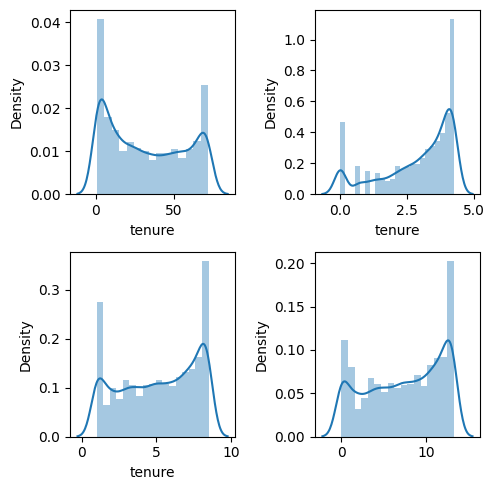

0.24
-0.96
-0.23
-0.29


<ipython-input-59-2bc07e1a67de>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(frame[feature], ax=ax[0,0])
<ipython-input-59-2bc07e1a67de>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(frame[feature]), ax=ax[0,1])
<ipython-input-59-2bc07e1a67de>:9: UserWarning: 

`distplot` is a depr

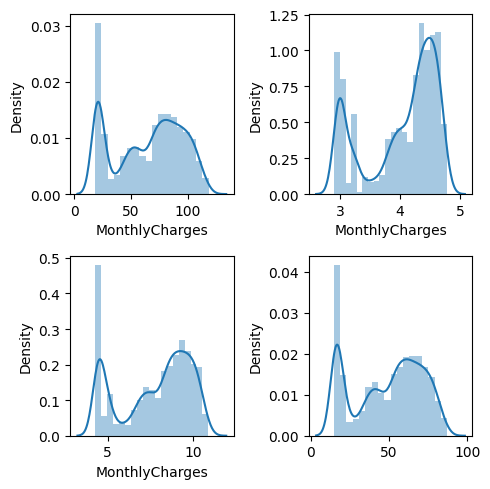

-0.22
-0.73
-0.49
-0.26


<ipython-input-59-2bc07e1a67de>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(frame[feature], ax=ax[0,0])
<ipython-input-59-2bc07e1a67de>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(frame[feature]), ax=ax[0,1])
<ipython-input-59-2bc07e1a67de>:9: UserWarning: 

`distplot` is a depr

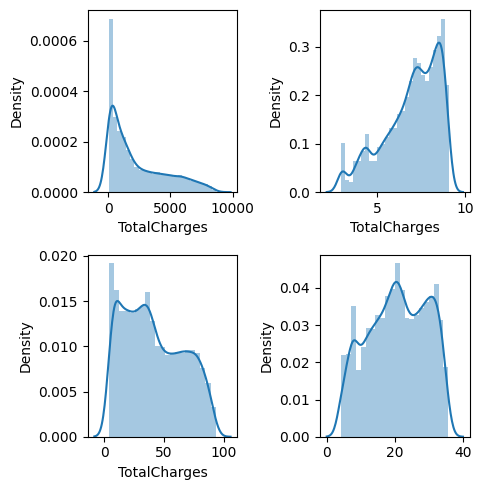

0.96
-0.75
0.31
-0.15


In [ ]:
#đưa về pp chuẩn
from scipy import stats
#Chuyển đổi dữ liệu để được phân phối chuẩn nhất gồm phân phối của dữ liệu gốc, logarit, căn bậc 2, căn bậc 3.
#Tạo hàm vẽ phân phối của các biến số gồm phân phối gốc, phân phối sau khi sửu dụng phương pháp chuyển đổi dữ liệu nói trên
def analyze_skewness(feature, frame):
   fig, ax = plt.subplots(2,2, figsize=(5,5))
   sns.distplot(frame[feature], ax=ax[0,0])
   sns.distplot(np.log(frame[feature]), ax=ax[0,1])
   sns.distplot(np.sqrt(frame[feature]), ax=ax[1,0])
   sns.distplot(stats.boxcox(frame[feature])[0], ax=ax[1,1])
   plt.tight_layout()
   plt.show()

   print(frame[feature].skew().round(2))
   print(np.log(frame[feature]).skew().round(2))
   print(np.sqrt(frame[feature]).skew().round(2))
   print(pd.Series(stats.boxcox(frame[feature])[0]).skew().round(2))
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: analyze_skewness(feat, telco)

In [ ]:
#Chọn phân phối có giá trị skew tiệm cận với 0 nhất là phân phối đó chuẩn nhất
telco_ = telco
telco_['tenure'] = np.sqrt(telco_['tenure'])
telco_['TotalCharges'] = stats.boxcox(telco_['TotalCharges'])[0]

<ipython-input-61-4bdda5ffdf84>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-61-4bdda5ffdf84>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-61-4bdda5ffdf84>:4: UserWarning: 

`distplot` is 

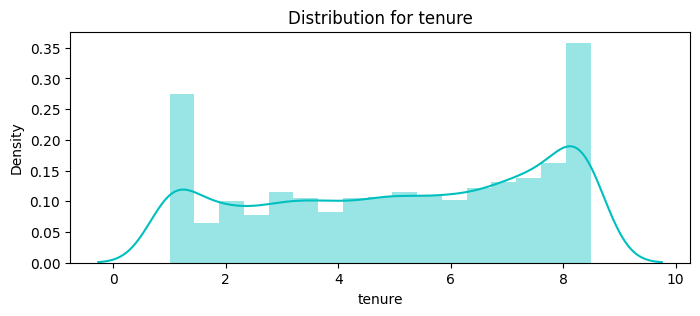

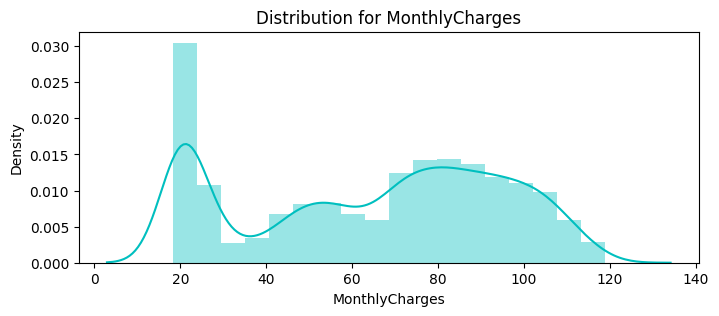

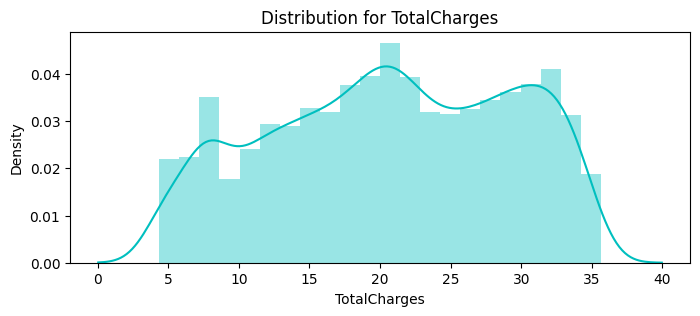

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

for feat in num_cols: distplot(feat, telco_, color='c')

<ipython-input-61-4bdda5ffdf84>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-61-4bdda5ffdf84>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-61-4bdda5ffdf84>:4: UserWarning: 

`distplot` is 

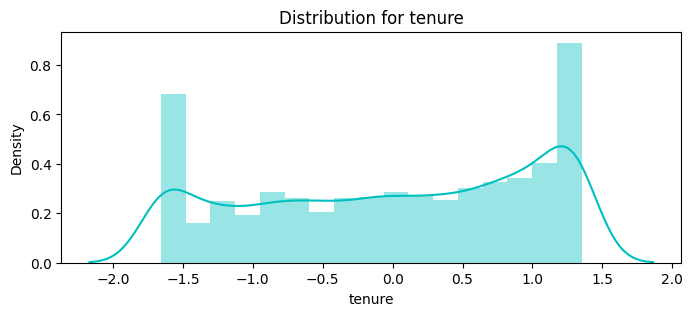

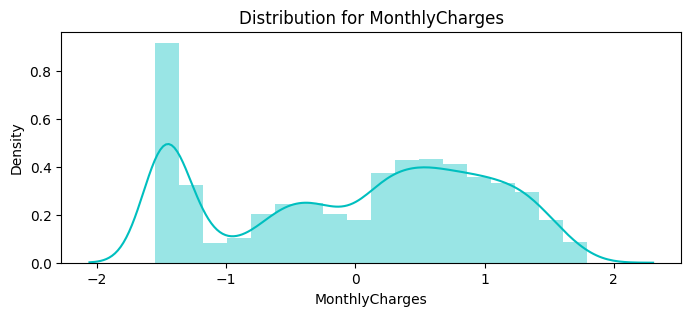

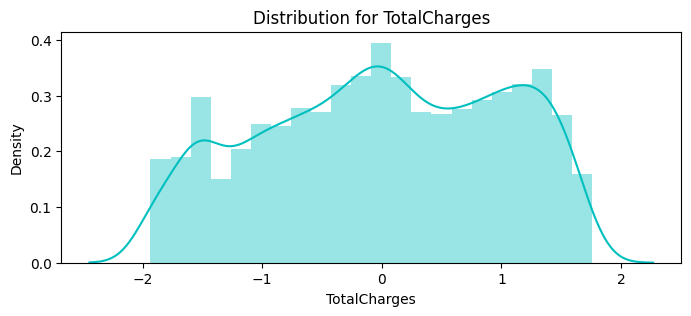

In [ ]:
#Standardization: scale dữ liệu bằng phương pháp chuẩn StandardScaler
telco_['tenure'] = StandardScaler().fit_transform(np.array(telco_['tenure']).reshape(-1, 1))
telco_['MonthlyCharges'] = StandardScaler().fit_transform(np.array(telco_['MonthlyCharges']).reshape(-1, 1))
telco_['TotalCharges'] = StandardScaler().fit_transform(np.array(telco_['TotalCharges']).reshape(-1, 1))

for feat in num_cols: distplot(feat, telco_, color='c')

## 4.2/Imbalanced data

Dùng SMOTE để xử lý imbalanced data

Thuật toán SMOTE là thuật toán xử lý imbalanced data bằng kỹ thuật oversampling.

In [ ]:
x = telco_.drop(columns = ['Churn'])
y = telco_['Churn'].values

In [ ]:
os = SMOTE(random_state=0)
columns = x.columns

os_data_x,os_data_y=os.fit_resample(x, y)

os_data_x = pd.DataFrame(data=os_data_x,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

#check number of data
print("length of oversampled data is ",len(os_data_x))
print("Number of retention customer",len(os_data_y[os_data_y['y']==0]))
print("Number of churn",len(os_data_y[os_data_y['y']==1]))
print("Proportion of retention data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_x))
print("Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_x))

length of oversampled data is  10326
Number of retention customer 5163
Number of churn 5163
Proportion of retention data in oversampled data is  0.5
Proportion of churn data in oversampled data is  0.5


## 4.3/Split data into test, train dataset

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(os_data_x,os_data_y,test_size=0.2, random_state=40, stratify=os_data_y)

In [ ]:
# Use StratifiedKFold to create folds with class distribution
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run K-Fold Cross Validation
for train_index, test_index in kf.split(os_data_x, os_data_y):
    x_train, x_test = os_data_x[train_index], os_data_x[test_index]
    y_train, y_test = os_data_y[train_index], os_data_y[test_index]

# 5/Features selection

## RFE

Dùng Recursive Feature Elimination (RFE) để chọn thuộc tính.

In [ ]:
logre_model = LogisticRegression()

In [ ]:
rfe = RFE(logre_model, step = 40)
rfe = rfe.fit(x_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
print(x_train.columns.values)
rfe_var = pd.DataFrame(x_train.columns.values,columns=['Variable'])
rfe_sp = pd.DataFrame(rfe.support_, columns=['Select'])
rfe_select = pd.concat([rfe_var,rfe_sp], axis = 'columns')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[False False False False False False False False False  True False  True
 False False  True  True  True  True  True  True  True  True False  True
  True False  True False False False False False  True  True  True  True
  True False  True  True]
[2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 1 1 1 1 1 1 1 2 1 1 2 1 2 2 2 2 2 1 1 1 1 1
 2 1 1]
['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'PaperlessBilling' 'MonthlyCharges' 'TotalCharges' 'MultipleLines_No'
 'MultipleLines_No phone service' 'MultipleLines_Yes'
 'InternetService_DSL' 'InternetService_Fiber optic' 'InternetService_No'
 'OnlineSecurity_No' 'OnlineSecurity_No internet service'
 'OnlineSecurity_Yes' 'OnlineBackup_No' 'OnlineBackup_No internet service'
 'OnlineBackup_Yes' 'DeviceProtection_No'
 'DeviceProtection_No internet service' 'DeviceProtection_Yes'
 'TechSupport_No' 'TechSupport_No internet service' 'TechSupport_Yes'
 'StreamingTV_No' 'StreamingTV_No internet service' 'StreamingTV_Yes'
 'StreamingMovies_No' 

In [ ]:
rfe_select

,Variable,Select
0,gender,False
1,SeniorCitizen,False
2,Partner,False
3,Dependents,False
4,tenure,False
5,PhoneService,False
6,PaperlessBilling,False
7,MonthlyCharges,False
8,TotalCharges,False
9,MultipleLines_No,True


In [ ]:
rfe_selected =rfe_select[rfe_select['Select']==True]

In [ ]:
rfe_selected['Variable'].unique()

array(['MultipleLines_No', 'MultipleLines_Yes', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingMovies_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year'], dtype=object)

In [ ]:
cols =rfe_selected['Variable'].unique().tolist()
cols

['MultipleLines_No',
 'MultipleLines_Yes',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_Yes',
 'StreamingMovies_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Contract_One year',
 'Contract_Two year']

## VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x_train[cols].columns

# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(x_train[cols].values, i)
                          for i in range(len(x_train[cols].columns))]
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                    feature       VIF
0                          MultipleLines_No  0.314192
1                         MultipleLines_Yes  0.317779
2                        InternetService_No       inf
3                         OnlineSecurity_No  1.283660
4        OnlineSecurity_No internet service       inf
5                        OnlineSecurity_Yes  0.430080
6                           OnlineBackup_No  0.288362
7          OnlineBackup_No internet service       inf
8                          OnlineBackup_Yes  0.151462
9                       DeviceProtection_No  0.299420
10                     DeviceProtection_Yes  0.120928
11                           TechSupport_No  0.812360
12                          TechSupport_Yes  0.838710
13                      StreamingMovies_Yes  0.120039
14  PaymentMethod_Bank transfer (automatic)  0.489718
15    PaymentMethod_Credit card (automatic)  0.313884
16           PaymentMethod_Electronic check  0.068452
17               PaymentMeth

## Final features selection


In [ ]:
cols.remove('OnlineSecurity_No internet service')
x_test = x_test[cols]
x_train = x_train[cols]

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x_train[cols].columns

# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(x_train[cols].values, i)
                          for i in range(len(x_train[cols].columns))]
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                    feature       VIF
0                          MultipleLines_No  0.314192
1                         MultipleLines_Yes  0.317779
2                        InternetService_No       inf
3                         OnlineSecurity_No  1.284929
4                        OnlineSecurity_Yes  0.430080
5                           OnlineBackup_No  0.288364
6          OnlineBackup_No internet service       inf
7                          OnlineBackup_Yes  0.151462
8                       DeviceProtection_No  0.299420
9                      DeviceProtection_Yes  0.120928
10                           TechSupport_No  0.814274
11                          TechSupport_Yes  0.838710
12                      StreamingMovies_Yes  0.120069
13  PaymentMethod_Bank transfer (automatic)  0.489718
14    PaymentMethod_Credit card (automatic)  0.313884
15           PaymentMethod_Electronic check  0.068452
16               PaymentMethod_Mailed check  0.234061
17                        Co

In [ ]:
cols.remove('OnlineBackup_No internet service')
x_test = x_test[cols]
x_train = x_train[cols]

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x_train[cols].columns

# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(x_train[cols].values, i)
                          for i in range(len(x_train[cols].columns))]
print(vif_data)

                                    feature       VIF
0                          MultipleLines_No  0.314192
1                         MultipleLines_Yes  0.317779
2                        InternetService_No  0.453923
3                         OnlineSecurity_No  1.284929
4                        OnlineSecurity_Yes  0.430080
5                           OnlineBackup_No  0.288364
6                          OnlineBackup_Yes  0.151462
7                       DeviceProtection_No  0.299420
8                      DeviceProtection_Yes  0.120928
9                            TechSupport_No  0.814274
10                          TechSupport_Yes  0.838710
11                      StreamingMovies_Yes  0.120069
12  PaymentMethod_Bank transfer (automatic)  0.489718
13    PaymentMethod_Credit card (automatic)  0.313884
14           PaymentMethod_Electronic check  0.068452
15               PaymentMethod_Mailed check  0.234061
16                        Contract_One year  0.052446
17                        Co

In [ ]:
os_data_x[cols].to_csv("os_data_x.csv")
os_data_y.to_csv("os_data_y.csv")

# 6/Machine learning method

In [ ]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method);
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2);
    return (auc_score, fpr_df, tpr_df)

In [ ]:
def auc_plot(model,x_test,y_target):
    fig, ax = plt.subplots(figsize=(7,7))
    fig.tight_layout(pad=3, h_pad=2, w_pad=4)
    fig.suptitle(type(model).__name__, weight=12)
    y_pred_prob = model.predict_proba(x_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_target, y_pred_prob, drop_intermediate=False)
    auc = roc_auc_score(y_target, y_pred_prob)

    ax.plot(fpr, tpr, color='blue', label= f'AUC = {auc:2.2f}')
    ax.plot([0,1], [0,1.01], 'r--', lw=1)
    ax.legend(loc='lower right', fontsize=10)
    ax.set_ylabel('True Positive Rate', fontsize=10)
    ax.set_xlabel('Flase Positve Rate', fontsize=10)
    ax.set_title("Receiver Operating Characteristic (ROC) curve", fontsize=10)

## 6.1/ Logistics regression model

In [ ]:
#Logistic Regression Model Fitting
logre_model = LogisticRegression().fit(x_train,y_train)
logre_pred= logre_model.predict(x_test)
print(accuracy_score(y_test, logre_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7962245885769603


In [ ]:
report = classification_report(y_test,logre_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1033
           1       0.77      0.84      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



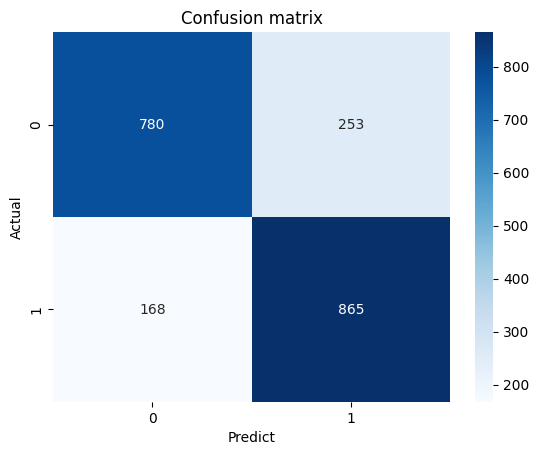

In [ ]:
confusion = confusion_matrix(y_test, logre_pred, labels = [0,1])
sns.heatmap(confusion, annot=True, cmap='Blues',fmt="d",
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

## 6.2/ Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
rf_model.fit(x_train, y_train)

# Make predictions
rf_predict = rf_model.predict(x_test)
print(accuracy_score(y_test, rf_predict))

<ipython-input-83-e9624240b6ed>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.7754114230396902


In [ ]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1033
           1       0.77      0.79      0.78      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



## 6.3/ SVM

In [ ]:
#model.svm = SVC(kernel='linear')
svc_model = SVC(random_state = 1,probability=True)
svc_model.fit(x_train,y_train)
svc_predict = svc_model.predict(x_test)
accuracy_svc = svc_model.score(x_test,y_test)
print("SVM accuracy is :",accuracy_svc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM accuracy is : 0.8000968054211036


In [ ]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1033
           1       0.79      0.82      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



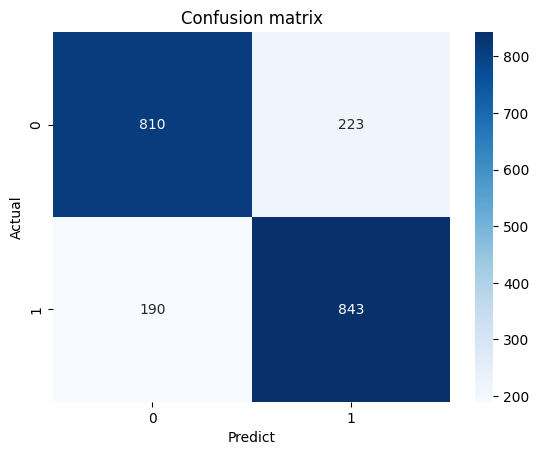

In [ ]:
confusion = confusion_matrix(y_test, svc_predict, labels = [0,1])
sns.heatmap(confusion, annot=True, cmap='Blues',fmt="d",
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

## 6.4/ XGBoost

In [ ]:
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train, y_train)
xgboost_predict = xgboost_model.predict(x_test)
accuracy_score(y_test, xgboost_predict)

0.8015488867376573

In [ ]:
print(classification_report(y_test, xgboost_predict))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1033
           1       0.79      0.82      0.81      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



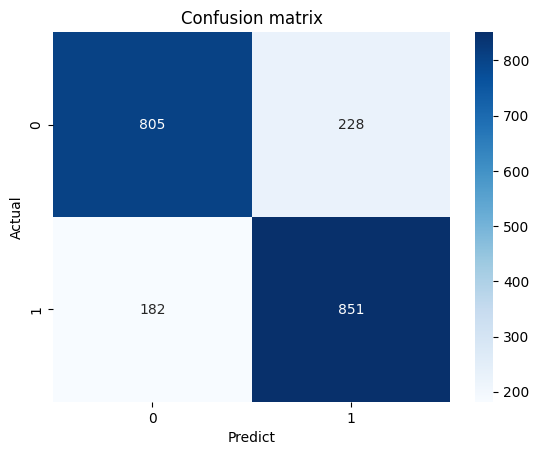

In [ ]:
confusion = confusion_matrix(y_test, xgboost_predict, labels = [0,1])
sns.heatmap(confusion, annot=True, cmap='Blues',fmt="d",
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

## 6.5/ CatBoost

In [ ]:
catboost_model = CatBoostClassifier(iterations=500,
                             learning_rate=0.04,
                            #  depth=6,
                             eval_metric='AUC',
                             random_seed = 42,
                             bagging_temperature = 0.1,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)
catboost_model.fit(x_train, y_train,
             eval_set=(x_test, y_test),
             use_best_model=True,
             verbose=200)

0:	test: 0.8297349	best: 0.8297349 (0)	total: 50.3ms	remaining: 25.1s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8885139852
bestIteration = 143

Shrink model to first 144 iterations.


In [ ]:
catboost_predict = catboost_model.predict(x_test)
print(classification_report(y_test, catboost_predict))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1033
           1       0.80      0.82      0.81      1033

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066



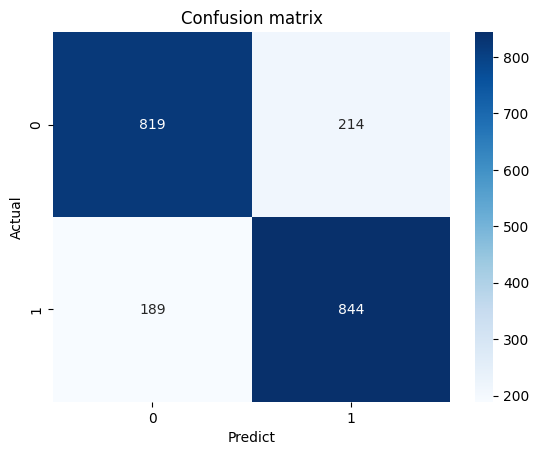

In [ ]:
confusion = confusion_matrix(y_test, catboost_predict, labels = [0,1])
sns.heatmap(confusion, annot=True, cmap='Blues',fmt="d",
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

## 6.6/ LightGBM

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=7000, max_depth=2, num_leaves=2, random_state=42)
lgbm_clf.fit(x_train, y_train)
y_pred = lgbm_clf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79      1033
           1       0.77      0.84      0.80      1033

    accuracy                           0.79      2066
   macro avg       0.80      0.79      0.79      2066
weighted avg       0.80      0.79      0.79      2066



## 6.7/ AdaBoost

In [ ]:
a_model = AdaBoostClassifier()
a_model.fit(x_train,y_train)
a_preds = a_model.predict(x_test)
print("AdaBoost Classifier accuracy")
accuracy_score(y_test, a_preds)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost Classifier accuracy


0.7807357212003873

In [ ]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1033
           1       0.75      0.84      0.79      1033

    accuracy                           0.78      2066
   macro avg       0.79      0.78      0.78      2066
weighted avg       0.79      0.78      0.78      2066



## 6.8/ Gradient Boosting Classifier

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)

accuracy_score(y_test, y_pred_gb)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7967086156824782

In [ ]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1033
           1       0.78      0.83      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



## 6.9/ Extra Trees Classifier

In [ ]:
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_pred_etc = etc.predict(x_test)

accuracy_score(y_test, y_pred_etc)

<ipython-input-107-16117fcdced7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etc.fit(x_train, y_train)


0.7991287512100678

In [ ]:
print(classification_report(y_test, y_pred_etc))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1033
           1       0.79      0.82      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066

